#### Data Analyst: Reuben Yohanna Vandi

# SUPPLY CHAIN ANALYSIS
The supply Chain is the network of production and logistics involved in producing and delivering goods to customers. And Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers.
Supply chain analysis is the process of evaluating every stage of a supply chain starting from the time the business acquires raw materials or supplies from its suppliers to the delivery of final products to the customers.

## Problem Statement
Our company's supply chain is facing significant challenges, resulting in inefficient inventory management, high inspection failure rates, and inconsistent product availability. With unclear visibility into our inventory turnover, lead times, and quality control processes, we are struggling to meet customer demand, reduce costs, and increase profitability. How can we optimize our supply chain to improve product availability, reduce inspection failures, and enhance overall efficiency?

## Objectives
1. Which supplier has the least lead time?
2. What is the defect rate across product types (skincare, haircare, cosmetics)?
3. What is the average shipping time across shipping carriers?
4. What is the inventory turnover ratio for each product category?
5. What is the total shipping cost and average shipping cost across all shipping carriers and transportation modes?
6. What is the revenue allocation towards total expenses (manufacturing, costs, and shipping) and the net profit margins for each product category?
7. What is the number of products sold and the average price of each product type?
8. How do manufacturing costs compare to revenue across product types?
9. How does production volume compare to order quantity by product type?
10. How does production volume affect inspection results analysis by product type?
11. How does average shipping cost compare to shipping time by location?
12. How does average shipping time compare to average defect rate by transportation mode?
13. How does average shipping cost compare to average shipping time by shipping carrier?
14. How does average shipping cost vary by transportation mode and route?



## Methodology
Before diving into the analysis, we made sure the data is clean by:

* Removing duplicate records.
* Checking and handling missing values.
* Verifying data types for each column.


## Tools & Technologies
The use of Python Libraries such as:
* Numpy
* Pandas
* Matplotlib
* collections

### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Reuben Yohanna Vandi\Documents\PORTFOLIO\Supply Chain\Onyx Data - DataDNA Dataset Challenge - Supply Chain  Dataset - November 2024 - Copy.csv")
#pd.set_option('display.max.rows', 101) 
pd.set_option('display.max.columns', 25) 
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,9,Carrier B,8.630339,Supplier 4,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,Carrier C,5.352878,Supplier 3,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,9,Carrier A,7.904846,Supplier 4,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,7,Carrier B,1.409801,Supplier 5,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


### Data Cleaning

#### * Removal of Duplicate rows

In [3]:
#Confirming if dataset has duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

#### * Count of blanks (Missing Values)

In [4]:
#Confirming the presence of any null values
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

#### * Verifying data types for each column

In [5]:
#Familarizing with the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

### Exploratory Data Analysis [EDA]

#### Transaction Count

In [6]:
df['SKU'].count()

100

Total Supply Chain Transactions: 100

#### Total Order

In [7]:
df['Order quantities'].sum()

4922

Total Order that was placed: 4,922

#### List of Product Type

In [8]:
df['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

Product Types: Haircare, Skincare, & Cosmetics.

#### Average Price ($) of Sold Item

In [9]:
df['Price'].mean()

49.46246134491

Overall Average Price of Products Sold: $50

In [10]:
df.groupby('Product type')['Price'].mean().sort_values(ascending=False)

Product type
cosmetics    57.361058
skincare     47.259329
haircare     46.014279
Name: Price, dtype: float64

Average Selling Price of each Product type: 
* Cosmetics = 57 Dollar
* Haircare = 46 Dollar
* Skincare = 47 Dollar

#### List of Locations

In [11]:
df['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

Supply Chain Locations include: Mumbai, Kolkata, Delhi, Bangalore, and Chennai.

#### List of Supplier

In [12]:
df['Supplier name'].unique()

array(['Supplier 3', 'Supplier 1', 'Supplier 5', 'Supplier 4',
       'Supplier 2'], dtype=object)

The company's supply chain involves the following suppliers of product raw materials and components: Supplier 1, Supplier 2, Supplier 3, Supplier 4, and Supplier 5.

#### Supply Chain Mode of Transportation

In [13]:
df['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

Supply Chain Transportation Modes: Road, Air, Rail, & Sea.

#### List of Shipping Carriers

In [14]:
df['Shipping carriers'].unique()

array(['Carrier B', 'Carrier A', 'Carrier C'], dtype=object)

Supply Chain Shipping/Logistics Partners: Carrier A, Carrier B, and Carrier C.

#### Supply Chain Route Network

In [15]:
df['Routes'].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

Supply Chain Route Network: Route A, Route B, Route C.

#### Integer Columns Aggregation (Sum)

In [16]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [17]:
df.groupby('Product type').agg({'Availability':'sum', 'Stock levels':'sum', 'Number of products sold':'sum', 
                                'Order quantities':'sum', 'Production volumes':'sum',  'Manufacturing costs':'sum',
                                'Shipping costs':'sum', 'Costs':'sum', 'Revenue generated':'sum'})

,Availability,Stock levels,Number of products sold,Order quantities,Production volumes,Manufacturing costs,Shipping costs,Costs,Revenue generated
Product type,,,,,,,,,
cosmetics,1332,1525,11757,1343,12461,1119.371253,157.563663,13366.397283,161521.266001
haircare,1471,1644,13611,1480,19957,1647.571776,200.863735,17328.862865,174455.390606
skincare,2037,1608,20731,2099,24366,1959.726295,196.387510,22229.318068,241628.162133


In [18]:
#Totalling the above aggregated columns
df[['Availability', 'Stock levels', 'Number of products sold', 
    'Order quantities', 'Production volumes',  'Manufacturing costs',
    'Shipping costs', 'Costs', 'Revenue generated']].sum()

Availability                 4840.000000
Stock levels                 4777.000000
Number of products sold     46099.000000
Order quantities             4922.000000
Production volumes          56784.000000
Manufacturing costs          4726.669324
Shipping costs                554.814907
Costs                       52924.578215
Revenue generated          577604.818740
dtype: float64

Our analysis reveals that Skincare products are the most widely available, with a staggering 2,037 product types, followed by Haircare (1,471) and Cosmetics (1,332), totaling 4,840.

But availability is just the beginning. When it comes to stock levels, Haircare products take the lead, with 1,644 units in stock, narrowly surpassing Skincare (1,608) and Cosmetics (1,525), totaling 4,777 units.

However, Skincare products steal the show when it comes to sales, with a whopping 20,731 units sold, followed by Haircare (13,611) and Cosmetics (11,757), totaling 46,099 units.

This trend continues with order quantities, where Skincare products top the list with 2,099 orders, followed by Haircare (1,480) and Cosmetics (1,343), totaling 4,922 units.

Given their immense popularity, it's no surprise that Skincare products have the highest production volumes, with 24,366 units produced, followed by Haircare (19,957) and Cosmetics (12,461), totaling 56,784 units.

As we explore the financial aspects, Skincare products again take the lead in manufacturing costs, with 1,959.7 Dollars, followed by Haircare 1,647.6 Dollars, and Cosmetics 1,119.4 Dollars, totaling 4,726.7 Dollars.

However, Haircare products incur the highest shipping costs, with 200.9 Dollars, followed by Skincare 196.4 Dollars and Cosmetics 157.6 Dollars, totaling 554.8 Dollars.

When it comes to overall supply chain costs, Skincare products top the list with 22,229.3 Dollars, followed by Haircare 17,328.9 Dollars, and Cosmetics 13,366.4 Dollars, totaling 52,924.5 Dollars.

Finally, the revenue generated by each product category reveals a clear winner: Skincare products, with a staggering $241,628, followed by Haircare 174,455 Dollars, and Cosmetics 161,521 Dollars, cumulatively reaching 577,604.8 Dollars.

This comprehensive analysis paints a vivid picture of the skincare industry's dominance, highlighting its impressive sales, production volumes, and revenue generation.

#### Order quantity & Revenue Generated by Location and Customer demographics

In [19]:
df.groupby(['Location','Customer demographics']).agg({'Order quantities':'sum', 'Revenue generated':'sum'})

Order quantities  Revenue generated
Location  Customer demographics                                     
Bangalore Female                              194       31984.736279
          Male                                172       32013.151045
          Non-binary                          396       36192.081924
          Unknown                               7        2411.754632
Chennai   Female                              216       25361.167313
          Male                                217       27967.825528
          Non-binary                          157        9595.839301
          Unknown                             519       56217.983608
Delhi     Female                              343       41346.579416
          Male                                150       13093.216793
          Non-binary                          100        4707.654962
          Unknown                             140       21880.250054
Kolkata   Female                              240       32862.333872
          Male                                250       28208.649917
          Non-binary                          331       27653.394244
          Unknown                             407       48353.172972
Mumbai    Female                              148       29959.672241
          Male                                110       25351.550977
          Non-binary                          308       38216.831087
          Unknown                             517       44226.972575

This analysis of order quantities and revenue generated by customer demographics across five cities reveals:

- Female customers in Bangalore and Mumbai generate significant revenue (31,984 and 29,959 Dollars, respectively).
- Non-binary customers in Bangalore have the highest order quantity (396) and revenue (36,192 Dollars).
- Unknown customer demographics in Chennai and Mumbai have surprisingly high revenue (56,218 and 44,227 Dollars, respectively).
- Male customers in Kolkata have the highest revenue (28,209 Dollars) among all male demographics.

Insights:

- Bangalore's non-binary customers are a key revenue driver.
- Unknown customer demographics in Chennai and Mumbai present opportunities for targeted marketing.
- Kolkata's male customers have significant purchasing power.

#### Product type, Order quantity, & Revenue Generated by Location

In [20]:
df.groupby(['Location','Product type']).agg({'Order quantities':'sum', 'Revenue generated':'sum'})

Order quantities  Revenue generated
Location  Product type                                     
Bangalore cosmetics                  114       19309.562879
          haircare                   297       51654.345695
          skincare                   358       31637.815306
Chennai   cosmetics                  319       31461.947456
          haircare                   318       28723.448933
          skincare                   472       58957.419361
Delhi     cosmetics                  405       37429.677332
          haircare                    71       14625.900766
          skincare                   257       28972.123127
Kolkata   cosmetics                  149       24163.571856
          haircare                   435       35027.713248
          skincare                   644       77886.265901
Mumbai    cosmetics                  356       49156.506478
          haircare                   359       44423.981964
          skincare                   368       44174.538438

In [21]:
df.groupby(['Location']).agg({'Order quantities':'sum', 'Revenue generated':'sum'}).sort_values(by='Order quantities', 
                                                                                                ascending=False)

,Order quantities,Revenue generated
Location,,
Kolkata,1228,137077.551005
Chennai,1109,119142.815750
Mumbai,1083,137755.026880
Bangalore,769,102601.723880
Delhi,733,81027.701225


This comparative analysis of cosmetics, haircare, and skincare sales across five cities (Bangalore, Chennai, Delhi, Kolkata, and Mumbai) reveals interesting trends:

- Cosmetics sales are highest in Mumbai (49,156 Dollars) and lowest in Bangalore (19,309 Dollars).
- Haircare sales are highest in Kolkata (35,027 Dollars) and lowest in Delhi (14,625 Dollars).
- Skincare sales are highest in Kolkata (77,886 Dollars) and lowest in Bangalore (31,637 Dollars).

Insights:

- Kolkata appears to be a strong market for both haircare and skincare products.
- Mumbai is a significant market for cosmetics.
- Delhi's sales are relatively low across all categories, indicating potential opportunities for growth.

Mumbai, the capital of India, generated the highest revenue at 137,755 Dollars (34.6% of total revenue), followed by Kolkata at 137,077.50 Dollars (34.4% of total revenue), Chennai at 119,142.80 Dollars (29.9% of total revenue), Bangalore at 102,601.70 Dollars (25.8% of total revenue), and Delhi with the lowest revenue at 81,027.70 Dollars (20.4% of total revenue).


#### *	Which supplier has the least average lead time?

In [22]:
df.groupby('Supplier name')['Lead times'].mean().sort_values(ascending=False)

Supplier name
Supplier 4    17.000000
Supplier 1    16.777778
Supplier 2    16.227273
Supplier 5    14.722222
Supplier 3    14.333333
Name: Lead times, dtype: float64

Obviously Supplier 3 recorded the least average lead time among all others

#### * What is the defect rate across product types (skincare, haircare, cosmetics)?

In [23]:
df.groupby('Product type')['Defect rates'].mean().sort_values(ascending=False)

Product type
haircare     2.483150
skincare     2.334681
cosmetics    1.919287
Name: Defect rates, dtype: float64

#### * What is the average shipping time across shipping carriers?

In [24]:
df.groupby('Shipping carriers')['Shipping times'].mean().sort_values(ascending=False)

Shipping carriers
Carrier A    6.142857
Carrier C    6.034483
Carrier B    5.302326
Name: Shipping times, dtype: float64

#### Overall Inventory turnover

In [25]:
df['Number of products sold'].sum() / df['Stock levels'].mean()

965.019886958342

####  * What is the inventory turnover ratio for each product category?

In [26]:
groupedproduct = df.groupby('Product type')
groupedproduct

In [27]:
Numprod = groupedproduct['Number of products sold'].sum().sort_values(ascending=False)
Numprod

Product type
skincare     20731
haircare     13611
cosmetics    11757
Name: Number of products sold, dtype: int64

In [28]:
Avg_stocklev = groupedproduct['Stock levels'].mean().sort_values(ascending=False)
Avg_stocklev

Product type
cosmetics    58.653846
haircare     48.352941
skincare     40.200000
Name: Stock levels, dtype: float64

In [29]:
#Creation of temporary table by concatinating two set of data (Numprod & Avg_stocklev)
tem_table = pd.concat([Numprod, Avg_stocklev], axis='columns', sort=False)
tem_table.rename(columns={'Stock levels':'Avg Stock levels'}, inplace=True)
tem_table

,Number of products sold,Avg Stock levels
Product type,,
skincare,20731,40.200000
haircare,13611,48.352941
cosmetics,11757,58.653846


In [30]:
#Calculating the inventory turnover ratio across product type by creating additional column for such purpose
tem_table['inventory turnover ratio'] = tem_table['Number of products sold'] / tem_table['Avg Stock levels']
tem_table.sort_values('inventory turnover ratio', ascending=False)

,Number of products sold,Avg Stock levels,inventory turnover ratio
Product type,,,
skincare,20731,40.200000,515.696517
haircare,13611,48.352941,281.492701
cosmetics,11757,58.653846,200.447213


This analysis of product types reveals:

- Skincare products have the highest number of products sold (20,731) and inventory turnover ratio (515).
- Haircare products have a relatively low inventory turnover ratio (281) despite having a moderate number of products sold (13,611).
- Cosmetics have the highest average stock levels (58) but a relatively low inventory turnover ratio (200).

Insights:

- Skincare products are fast-moving and have efficient inventory management.
- Haircare products may have inventory management issues, leading to lower turnover ratios.
- Cosmetics have high stock levels, indicating potential overstocking. 

#### * What is the total shipping cost and average shipping cost across all shipping carriers and transportation modes?

In [31]:
df.groupby(['Shipping carriers','Transportation modes']).agg({'Shipping costs': ['sum', 'mean']})

Shipping costs          
                                                  sum      mean
Shipping carriers Transportation modes                         
Carrier A         Air                       31.236945  6.247389
                  Rail                      44.798820  6.399831
                  Road                      60.120055  5.465460
                  Sea                       19.382011  3.876402
Carrier B         Air                       87.029715  6.216408
                  Rail                      78.465540  5.231036
                  Road                      54.740011  4.976365
                  Sea                       16.662353  5.554118
Carrier C         Air                       38.197164  5.456738
                  Rail                      29.870382  4.978397
                  Road                      45.861280  6.551611
                  Sea                       48.450631  5.383403

This shipping carrier analysis reveals:

- Carrier A has the lowest average shipping cost across all transportation modes (3.87- 6.40 Dollars).
- Carrier B has the highest total shipping cost for Air (87,029 Dollars) and Rail (78,465 Dollars) modes.
- Carrier C has the highest average shipping cost for Road (6.55 Dollars) mode.

Insights:

- Carrier A appears to be the most cost-effective option.
- Carrier C's high Road shipping costs may be due to route or capacity issues.

#### * What are the revenue allocation towards total expenses (manufacturing, costs, and shipping) and the net profit margins for each product category?

In [32]:
shipping_cost = df['Shipping costs'].sum()
manufac_cost = df['Manufacturing costs'].sum()
cost = df['Costs'].sum()
Overall_Expenses =shipping_cost + manufac_cost + cost
Revenue = df['Revenue generated'].sum()
Overall_Net_profit = Revenue - Overall_Expenses
Overall_Net_profit

519398.7562932569

In [33]:
Overall_Expenses

58206.062446743

###### Skincare Net Profit

In [34]:
Ptype = df['Product type'] == 'skincare'
skincare_Exp = df.loc[Ptype]['Shipping costs'].sum() + df.loc[Ptype]['Manufacturing costs'].sum() + df.loc[Ptype]['Costs'].sum()
skincare_Rev = df.loc[Ptype]['Revenue generated'].sum()
skincare_Net_Profit = skincare_Rev - skincare_Exp
skincare_Net_Profit

217242.730260332

In [35]:
skincare_Exp

24385.431872668003

##### Haircare Net Profit

In [36]:
Ptype = df['Product type'] == 'haircare'
haircare_Exp = df.loc[Ptype]['Shipping costs'].sum() + df.loc[Ptype]['Manufacturing costs'].sum() + df.loc[Ptype]['Costs'].sum()
haircare_Rev = df.loc[Ptype]['Revenue generated'].sum()
haircare_Net_Profit = haircare_Rev - haircare_Exp
haircare_Net_Profit

155278.092230314

In [37]:
haircare_Exp

19177.298375686

##### Cosmetics Net Profit

In [38]:
Ptype = df['Product type'] == 'cosmetics'
cosmetics_Exp = df.loc[Ptype]['Shipping costs'].sum() + df.loc[Ptype]['Manufacturing costs'].sum() + df.loc[Ptype]['Costs'].sum()
cosmetics_Rev = df.loc[Ptype]['Revenue generated'].sum()
cosmetics_Net_Profit = cosmetics_Rev - cosmetics_Exp
cosmetics_Net_Profit

146877.93380261102

In [39]:
cosmetics_Exp

14643.332198389002

#### * What is the number of products sold and the average price of each product type?

In [40]:
df['Number of products sold'].sum()

46099

In [41]:
df.groupby('Product type')['Number of products sold'].sum().sort_values(ascending=False)

Product type
skincare     20731
haircare     13611
cosmetics    11757
Name: Number of products sold, dtype: int64

In [42]:
df.groupby('Product type')['Price'].mean().sort_values(ascending=False)

Product type
cosmetics    57.361058
skincare     47.259329
haircare     46.014279
Name: Price, dtype: float64

#### * How do manufacturing costs compare to revenue across product types?

In [43]:
Product_types = df.groupby('Product type')

In [44]:
Product_types['Manufacturing costs'].sum()

Product type
cosmetics    1119.371253
haircare     1647.571776
skincare     1959.726295
Name: Manufacturing costs, dtype: float64

In [45]:
product_type = ['cosmetics','haircare','skincare']
Manufacturing_costs = [1119.371253, 1647.571776, 1959.726295]

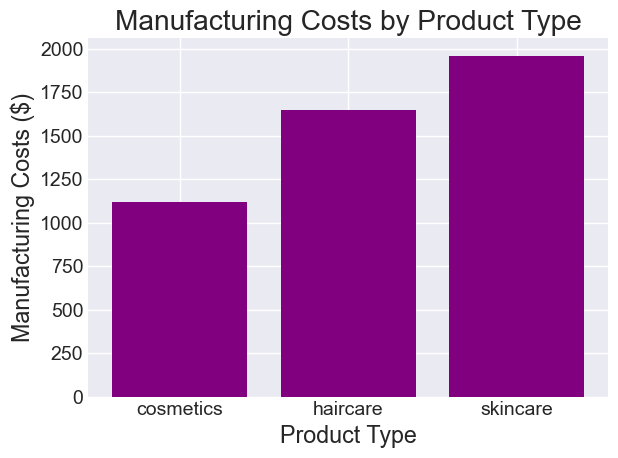

In [108]:
plt.bar(product_type, Manufacturing_costs, color='purple', label ='Manufacturing costs')
plt.title('Manufacturing Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Manufacturing Costs ($)')
plt.tight_layout() 
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

In [47]:
df.groupby('Product type')['Revenue generated'].sum()

Product type
cosmetics    161521.266001
haircare     174455.390606
skincare     241628.162133
Name: Revenue generated, dtype: float64

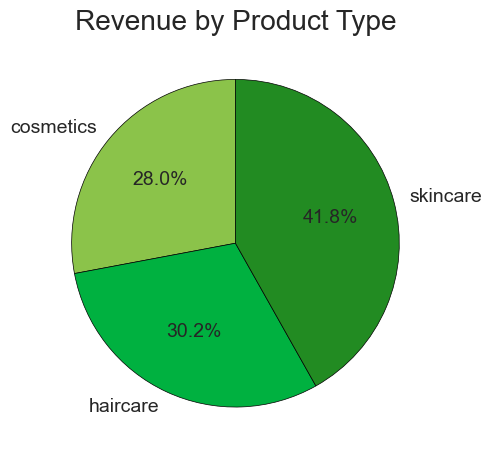

In [109]:
Revenue = [161521.266001, 174455.390606,  241628.162133]
Product_Type = ['cosmetics', 'haircare', 'skincare']
color = ['#8BC34A', '#00B140', '#228B22']

plt.pie(Revenue, labels=Product_Type, colors=color, startangle=90, autopct='%1.1f%%',  wedgeprops={'edgecolor':'black'})
plt.title('Revenue by Product Type')
plt.tight_layout() 
plt.style.use('fivethirtyeight')
plt.show()

#### * How does production volume compare to order quantity by product type?

In [49]:
df.groupby('Product type')['Production volumes'].sum()

Product type
cosmetics    12461
haircare     19957
skincare     24366
Name: Production volumes, dtype: int64

In [50]:
df.groupby('Product type')['Order quantities'].sum()

Product type
cosmetics    1343
haircare     1480
skincare     2099
Name: Order quantities, dtype: int64

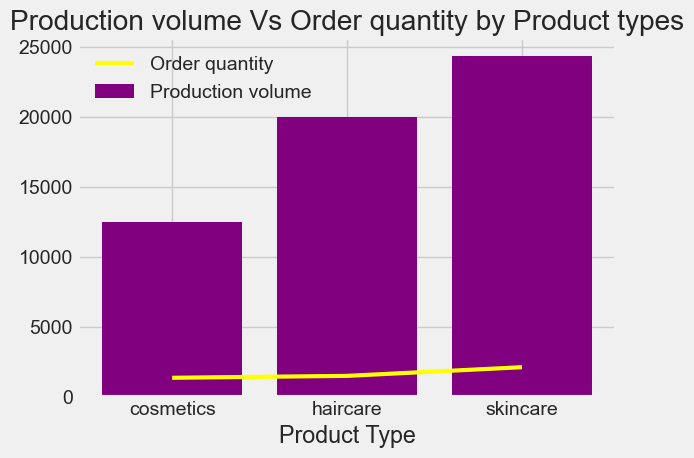

In [51]:
prod_vol = [12461, 19957, 24366]
order_quan = [1343, 1480, 2099]
Product_Type = ['cosmetics', 'haircare', 'skincare']

plt.bar(Product_Type, prod_vol, color='purple', linewidth=3, label='Production volume')
plt.plot(Product_Type, order_quan, color='yellow', linewidth=3, label='Order quantity')
plt.title('Production volume Vs Order quantity by Product types')
plt.xlabel('Product Type')
plt.legend(loc='upper left')
plt.tight_layout() 
plt.style.use('fivethirtyeight')
plt.show()

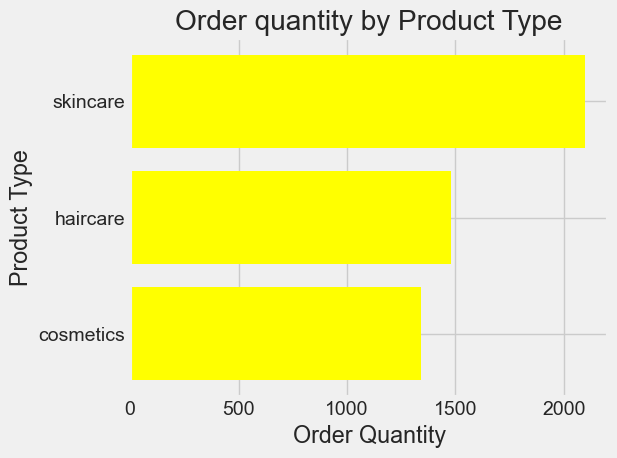

In [52]:
#For more clarity on Order quantity shown above, we intend to visual this variable separately to gain more insight on Order quantity across each product type
plt.barh(Product_Type, order_quan, color='yellow', linewidth=3, label='Order quantities')
plt.title('Order quantity by Product Type')
plt.ylabel('Product Type')
plt.xlabel('Order Quantity')
plt.tight_layout() 
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

#### * How does production volume affect inspection results analysis by product type?

In [53]:
df['Inspection results'].value_counts()

Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

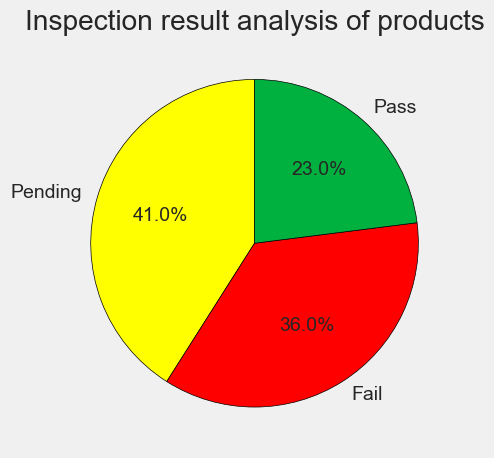

In [110]:
Inspection_results = [41, 36, 23]
color = ['Yellow', 'Red', '#00B140']
Inspection_fig = ['Pending','Fail','Pass']

plt.pie(Inspection_results, labels=Inspection_fig, colors=color, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'black'})
plt.title('Inspection result analysis of products')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [55]:
df.groupby('Inspection results')['Production volumes'].sum()

Inspection results
Fail       18853
Pass       12607
Pending    25324
Name: Production volumes, dtype: int64

In [56]:
#Haircare Inspection result analysis
Pending_haircare = (df['Product type'] == 'haircare') & (df['Inspection results'] == 'Pending')
Failed_haircare = (df['Product type'] == 'haircare') & (df['Inspection results'] == 'Fail')
Passed_haircare = (df['Product type'] == 'haircare') & (df['Inspection results'] == 'Pass')
df.loc[Pending_haircare,'Production volumes'].sum()

9303

In [57]:
df.loc[Failed_haircare,'Production volumes'].sum()

7494

In [58]:
df.loc[Passed_haircare,'Production volumes'].sum()

3160

In [59]:
haircare_Inspection_result = [9303,7494,3160]
haircare_result = ['Pending','Fail','Pass',]
colors = ['Yellow','Red','Green']

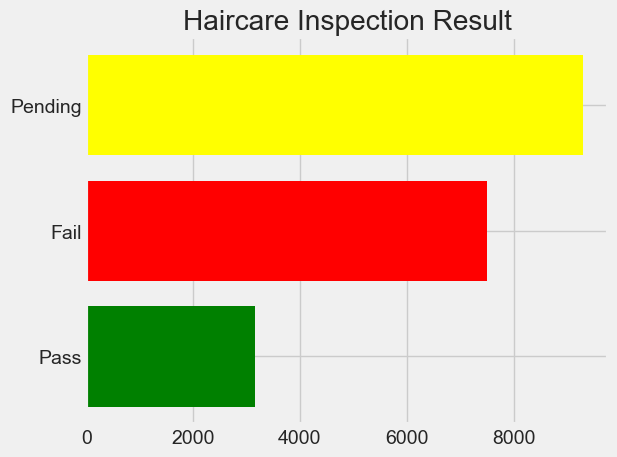

In [60]:
haircare_Inspection_result.reverse()
haircare_result.reverse()
colors.reverse()

plt.barh(haircare_result, haircare_Inspection_result, color=colors)
plt.title('Haircare Inspection Result')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [61]:
#Skincare inspection result analysis
Pending_skincare = (df['Product type'] == 'skincare') & (df['Inspection results'] == 'Pending')
Failed_skincare = (df['Product type'] == 'skincare') & (df['Inspection results'] == 'Fail')
Passed_skincare = (df['Product type'] == 'skincare') & (df['Inspection results'] == 'Pass')
df.loc[Pending_skincare,'Production volumes'].sum()

10464

In [62]:
df.loc[Failed_skincare,'Production volumes'].sum()

7658

In [63]:
df.loc[Passed_skincare,'Production volumes'].sum()

6244

In [64]:
skincare_Inspection_result = [10464,7658,6244]
skincare_result = ['Pending','Fail','Pass',]
colors = ['Yellow','Red','Green']

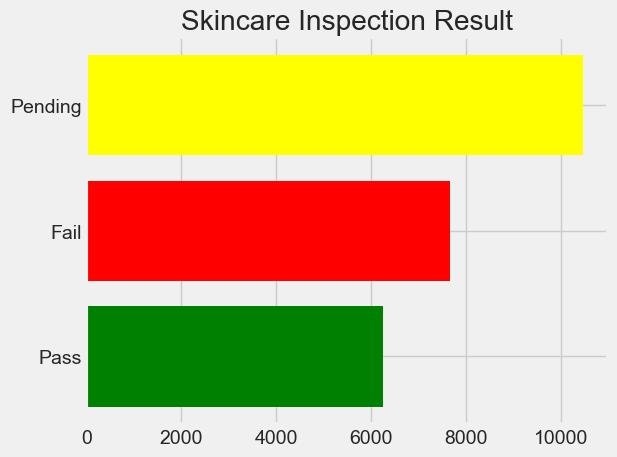

In [65]:
skincare_Inspection_result.reverse()
skincare_result.reverse()
colors.reverse()

plt.barh(skincare_result, skincare_Inspection_result, color=colors)
plt.title('Skincare Inspection Result')
plt.tight_layout()
plt.show()

In [66]:
#Cosmetics Inspection result analysis
Pending_cosmetics = (df['Product type'] == 'cosmetics') & (df['Inspection results'] == 'Pending')
Failed_cosmetics = (df['Product type'] == 'cosmetics') & (df['Inspection results'] == 'Fail')
Passed_cosmetics = (df['Product type'] == 'cosmetics') & (df['Inspection results'] == 'Pass')
df.loc[Pending_cosmetics,'Production volumes'].sum()

5557

In [67]:
df.loc[Failed_cosmetics,'Production volumes'].sum()

3701

In [68]:
df.loc[Passed_cosmetics,'Production volumes'].sum()

3203

In [69]:
cosmetics_Inspection_result = [5557,3701,3203]
cosmetics_result = ['Pending','Fail','Pass',]
colors = ['Yellow','Red','Green']

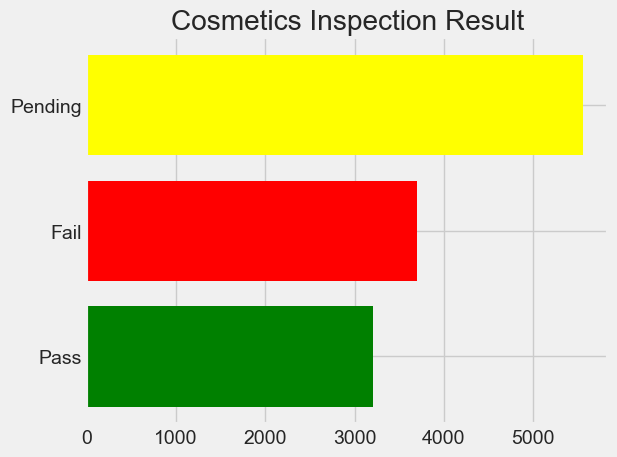

In [70]:
cosmetics_Inspection_result.reverse()
cosmetics_result.reverse()
colors.reverse()

plt.barh(cosmetics_result, cosmetics_Inspection_result, color=colors)
plt.title('Cosmetics Inspection Result')
plt.tight_layout()
plt.show()

#### * How does average shipping cost compare to shipping time by location?

In [71]:
Location = df.groupby('Location')

In [72]:
Location['Shipping times'].mean()

Location
Bangalore    5.277778
Chennai      6.000000
Delhi        5.933333
Kolkata      5.960000
Mumbai       5.545455
Name: Shipping times, dtype: float64

In [73]:
#Average Shipping times (DAY) across Locations
Avg_Shipping_times = [5.277778,6.000000,5.933333,5.960000,5.545455]
Locations =        ['Bangalore','Chennai','Delhi','Kolkata','Mumbai']

In [74]:
Location['Shipping costs'].mean()

Location
Bangalore    5.748445
Chennai      4.689079
Delhi        5.069881
Kolkata      5.761414
Mumbai       6.248989
Name: Shipping costs, dtype: float64

In [75]:
#Cost of average shipping across Locations
Avg_Shipping_costs = [5.748445, 4.689079, 5.069881, 5.761414, 6.248989]
Locations =          ['Bangalore','Chennai','Delhi','Kolkata','Mumbai']

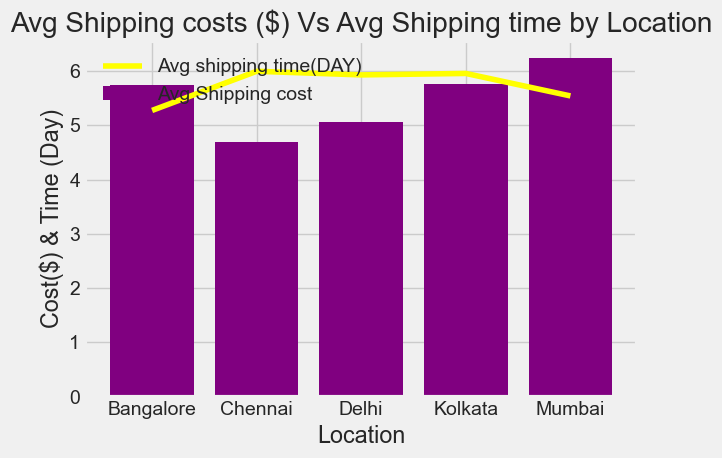

In [76]:
plt.bar(Locations, Avg_Shipping_costs, color='purple', label='Avg Shipping cost')
plt.plot(Locations, Avg_Shipping_times, color='yellow', label='Avg shipping time(DAY)')
plt.title('Avg Shipping costs ($) Vs Avg Shipping time by Location')
plt.ylabel('Cost($) & Time (Day)')
plt.xlabel('Location')
plt.legend(loc='upper left')
plt.style.use('seaborn-v0_8-darkgrid')
plt.tight_layout()
plt.show()

#### * How does average shipping time compare to average defect rate by transportation mode?

In [77]:
Transportation_mode = df.groupby('Transportation modes')

In [78]:
Transportation_mode['Shipping times'].mean()

Transportation modes
Air     5.115385
Rail    6.571429
Road    4.724138
Sea     7.117647
Name: Shipping times, dtype: float64

In [79]:
#Average shipping times (DAY) by transportation modes
Avg_Shipping_time_by_TM = [5.115385, 6.571429, 4.724138, 7.117647] 
Transportation_modes_TM =      ['Air',  'Rail',   'Road',  'Sea']

In [80]:
Transportation_mode['Defect rates'].mean()

Transportation modes
Air     1.823924
Rail    2.318814
Road    2.620938
Sea     2.315281
Name: Defect rates, dtype: float64

In [81]:
#Average defect rates by transportation modes
Avg_Defect_rates_by_TM = [1.823924, 2.318814, 2.620938, 2.315281]  
Transportation_modes_TM = ['Air',   'Rail'   ,'Road',   'Sea']

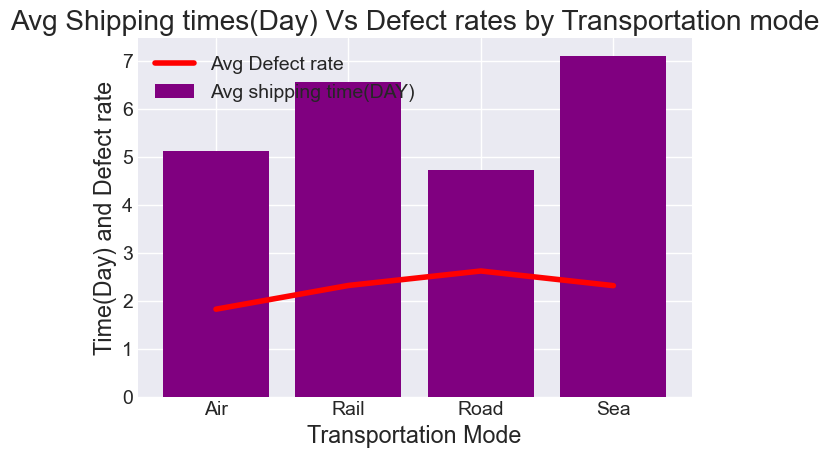

In [82]:
plt.bar(Transportation_modes_TM, Avg_Shipping_time_by_TM, color='purple', label='Avg shipping time(DAY)')
plt.plot(Transportation_modes_TM, Avg_Defect_rates_by_TM, color='red', label='Avg Defect rate')
plt.title('Avg Shipping times(Day) Vs Defect rates by Transportation mode')
plt.ylabel('Time(Day) and Defect rate')
plt.legend(loc='upper left')
plt.xlabel('Transportation Mode')
plt.style.use('seaborn-v0_8-darkgrid')
plt.tight_layout()
plt.show()

#### * How does average shipping cost compare to average shipping time by shipping carrier?
 

In [83]:
Shipping_carriers = df.groupby('Shipping carriers')

In [84]:
Shipping_carriers['Shipping costs'].mean()

Shipping carriers
Carrier A    5.554923
Carrier B    5.509247
Carrier C    5.599292
Name: Shipping costs, dtype: float64

In [85]:
#Average cost of shipping across Carriers
Avg_Shipping_cost_by_carriers = [5.554923,5.509247,5.599292] 
shipping_carriers =           ['Carrier A','Carrier B','Carrier C']

In [86]:
Shipping_carriers['Shipping times'].mean()

Shipping carriers
Carrier A    6.142857
Carrier B    5.302326
Carrier C    6.034483
Name: Shipping times, dtype: float64

In [87]:
#Average shipping times (DAY) across Carriers
Avg_Shipping_times_by_carriers = [6.142857,5.302326,6.034483]
shipping_carriers =           ['Carrier A','Carrier B','Carrier C']

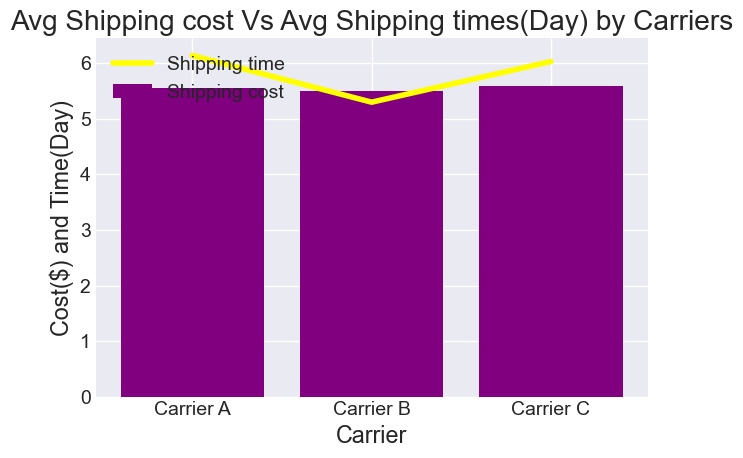

In [88]:
plt.bar(shipping_carriers, Avg_Shipping_cost_by_carriers, color='purple', label='Shipping cost')
plt.plot(shipping_carriers, Avg_Shipping_times_by_carriers, color='yellow', label='Shipping time')
plt.title('Avg Shipping cost Vs Avg Shipping times(Day) by Carriers')
plt.ylabel('Cost($) and Time(Day)')
plt.legend(loc='upper left')
plt.xlabel('Carrier')
plt.style.use('seaborn-v0_8-darkgrid')
plt.tight_layout()
plt.show()

#### * How does average shipping cost vary by transportation mode and route?

In [89]:
#List of Shipping Routes
df['Routes'].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

In [90]:
#Route A costs of shipping by Transportation modes
RouteA_Air = (df['Routes'] == 'Route A') & (df['Transportation modes'] == 'Air')
df.loc[RouteA_Air,'Shipping costs'].mean()

7.05503543909091

In [91]:
RouteA_Rail = (df['Routes'] == 'Route A') & (df['Transportation modes'] == 'Rail')
df.loc[RouteA_Rail,'Shipping costs'].mean()

4.6665306565

In [92]:
RouteA_Road = (df['Routes'] == 'Route A') & (df['Transportation modes'] == 'Road')
df.loc[RouteA_Road,'Shipping costs'].mean()

5.613352809636364

In [93]:
RouteA_Sea = (df['Routes'] == 'Route A') & (df['Transportation modes'] == 'Sea')
df.loc[RouteA_Sea,'Shipping costs'].mean()

3.8061948855714287

In [94]:
RouteA_costs_of_shipping = [7.05503, 4.6665, 5.6133, 3.8061]
RouteA_Transportation_modes = ['Air', 'Rail', 'Road', 'Sea']

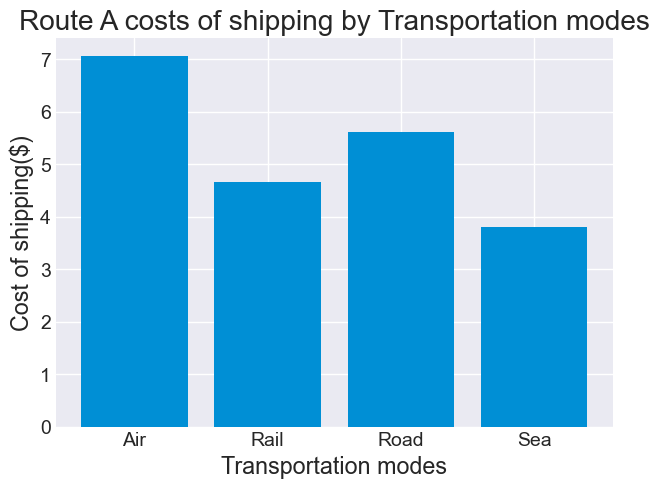

In [95]:
plt.bar(RouteA_Transportation_modes, RouteA_costs_of_shipping)
plt.title('Route A costs of shipping by Transportation modes')
plt.xlabel('Transportation modes')
plt.ylabel('Cost of shipping($)')
plt.show()

In [96]:
#Route B costs of shipping by Transportation modes
RouteB_Air = (df['Routes'] == 'Route B') & (df['Transportation modes'] == 'Air')
df.loc[RouteB_Air,'Shipping costs'].mean()

5.2694388515714286

In [97]:
RouteB_Rail = (df['Routes'] == 'Route B') & (df['Transportation modes'] == 'Rail')
df.loc[RouteB_Rail,'Shipping costs'].mean()

6.270496526

In [98]:
RouteB_Road = (df['Routes'] == 'Route B') & (df['Transportation modes'] == 'Road')
df.loc[RouteB_Road,'Shipping costs'].mean()

5.5311586763846154

In [99]:
RouteB_Sea = (df['Routes'] == 'Route B') & (df['Transportation modes'] == 'Sea')
df.loc[RouteB_Sea,'Shipping costs'].mean()

4.609479660833332

In [100]:
RouteB_costs_of_shipping = [5.2694, 6.2704, 5.5311, 4.6094]
RouteB_Transportation_modes = ['Air', 'Rail', 'Road', 'Sea']

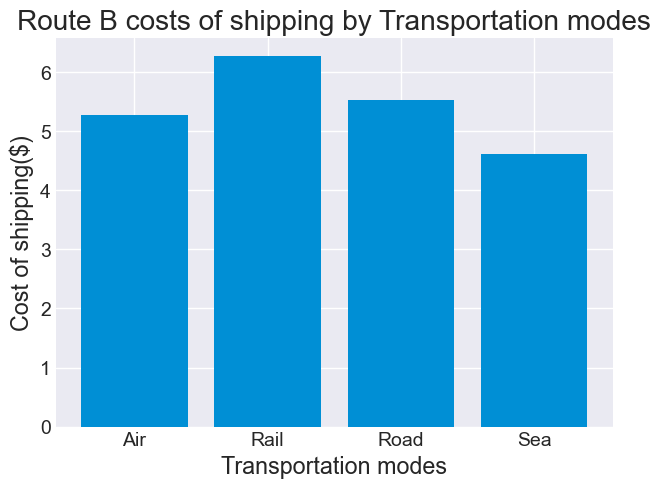

In [101]:
plt.bar(RouteB_Transportation_modes, RouteB_costs_of_shipping)
plt.title('Route B costs of shipping by Transportation modes')
plt.xlabel('Transportation modes')
plt.ylabel('Cost of shipping($)')
plt.show()

In [102]:
#Route C costs of shipping by Transportation modes
RouteC_Air = (df['Routes'] == 'Route C') & (df['Transportation modes'] == 'Air')
df.loc[RouteC_Air,'Shipping costs'].mean()

5.2465452536249995

In [103]:
RouteC_Rail = (df['Routes'] == 'Route C') & (df['Transportation modes'] == 'Rail')
df.loc[RouteC_Rail,'Shipping costs'].mean()

6.2759504113333335

In [104]:
RouteC_Road = (df['Routes'] == 'Route C') & (df['Transportation modes'] == 'Road')
df.loc[RouteC_Road,'Shipping costs'].mean()

5.4138805221999995

In [105]:
RouteC_Sea = (df['Routes'] == 'Route C') & (df['Transportation modes'] == 'Sea')
df.loc[RouteC_Sea,'Shipping costs'].mean()

7.54868817375

In [106]:
RouteC_costs_of_shipping = [5.2465, 6.2759, 5.4138, 7.5486]
RouteC_Transportation_modes = ['Air', 'Rail', 'Road', 'Sea']

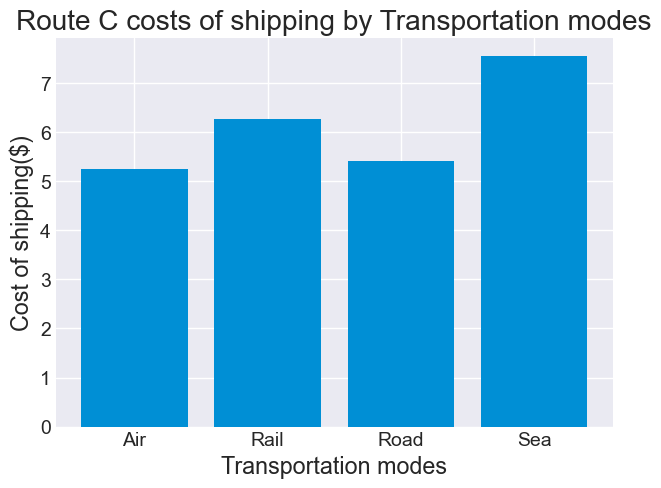

In [107]:
plt.bar(RouteC_Transportation_modes, RouteC_costs_of_shipping)
plt.title('Route C costs of shipping by Transportation modes')
plt.xlabel('Transportation modes')
plt.ylabel('Cost of shipping($)')
plt.show()

### Based on the comprehensive supply chain analysis, here are the overall key findings, conclusion, and recommendations:
## Key Findings


1. Product Sales: Skincare generates the highest revenue, followed by haircare and cosmetics.
2. Location-wise Performance: Bangalore, Chennai, and Mumbai are top-performing locations in terms of revenue.
3. Customer Demographics: Female customers contribute significantly to revenue across locations.
4. Inventory Management: Skincare has the highest inventory turnover ratio, indicating efficient management.
5. Inspection Results: Skincare has the highest pass rate, while haircare has the highest pending rate.
6. Shipping: Road transportation has the shortest shipping time (4.7 days), while air transportation has the lowest defect rate (1.8%).
7. Carrier Selection: Carrier B offers faster shipping times (5 days).
8. Cost-Effective Routes: Route A by Sea (3.8 Dollars) and Route B by Air (5.2 Dollars) and Sea (4.7 Dollars) offer competitive pricing.

## Recommendation


1. Optimize Inventory Management: Implement a just-in-time inventory system to reduce costs and improve efficiency.
2. Enhance Quality Control: Implement additional quality control measures to reduce pending inspection results, particularly for haircare products.
3. Targeted Marketing: Focus marketing efforts on female customers, who contribute significantly to revenue.
4. Shipping Cost Reduction: Negotiate with shipping carriers to reduce costs, particularly for Mumbai.
5. Carrier Selection and Route Optimization: Analyze and optimize routes to reduce shipping costs and times, and consider using Carrier B for faster shipping times.
6. Invest in Data Analytics: Continuously monitor and analyze supply chain data to identify areas for improvement and optimize operations.
7. Develop a Supply Chain Risk Management Plan: Identify potential risks and develop mitigation strategies to ensure business continuity and minimize disruptions.

## Conclusion


The comprehensive supply chain analysis provides valuable insights into the strengths and weaknesses of the current supply chain operations. Key areas for improvement include optimizing inventory management, enhancing quality control, reducing shipping costs and times, and improving carrier selection and route optimization.

#### Data Analyst: Reuben Yohanna Vandi
